In [2]:
import pandas as pd
import numpy as np
import matplotlib as ml
import seaborn as sns
df=pd.read_csv("PS_dataset.csv",index_col=None,na_values=["NA"])

<Axes: xlabel='quality'>

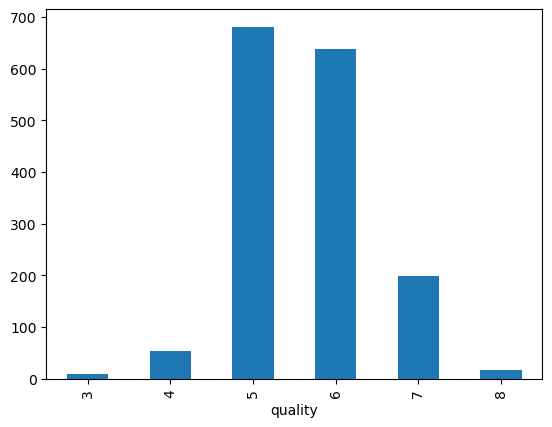

In [3]:
df.groupby("quality")["fixed acidity"].count().plot.bar() 

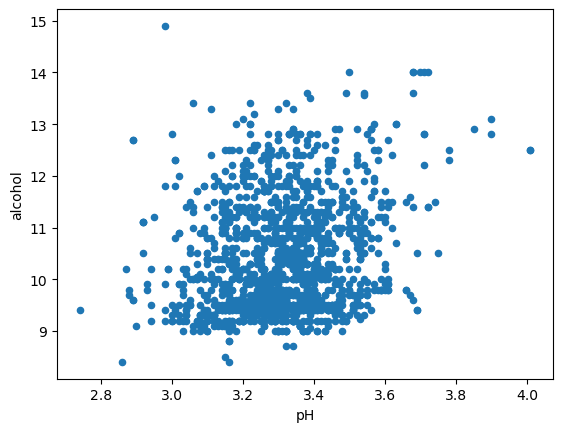

In [4]:
ax1=df.plot.scatter(x="pH",y="alcohol")

<Axes: ylabel='Frequency'>

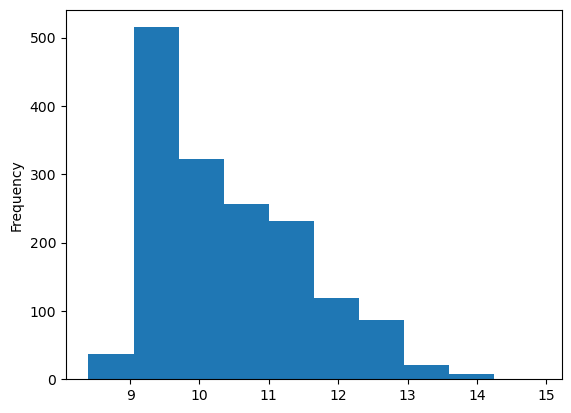

In [5]:
df["alcohol"].plot.hist()

3         Axes(0.1,0.679412;0.363636x0.220588)
4    Axes(0.536364,0.679412;0.363636x0.220588)
5         Axes(0.1,0.414706;0.363636x0.220588)
6    Axes(0.536364,0.414706;0.363636x0.220588)
7             Axes(0.1,0.15;0.363636x0.220588)
8        Axes(0.536364,0.15;0.363636x0.220588)
dtype: object

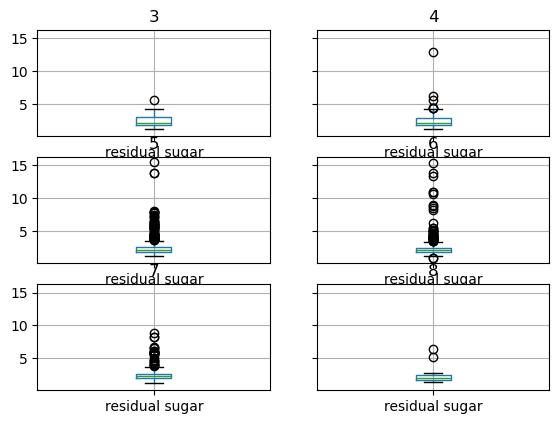

In [6]:
df.groupby("quality").boxplot(column="residual sugar")

<Axes: xlabel='free sulfur dioxide'>

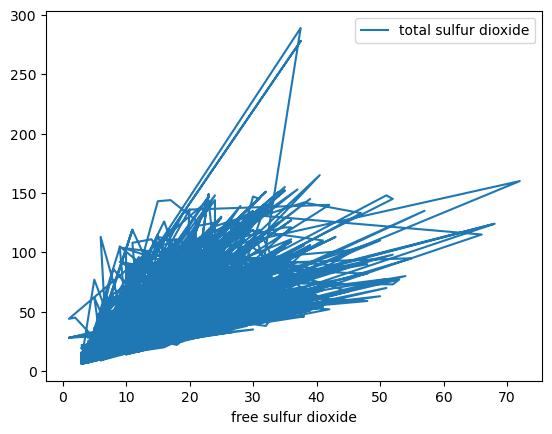

In [7]:
df.plot.line(x="free sulfur dioxide",y="total sulfur dioxide")

In [8]:
df['citric acid'].mean()

0.27101478494623654

In [9]:
df.min()

fixed acidity           4.60000
volatile acidity        0.12000
citric acid             0.00000
residual sugar          0.90000
chlorides               0.01200
free sulfur dioxide     1.00000
total sulfur dioxide    6.00000
density                 0.99007
pH                      2.74000
sulphates               0.33000
alcohol                 8.40000
quality                 3.00000
dtype: float64

In [10]:
df.max()

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      72.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [11]:
df["quality"][df["pH"]>3.5][df["alcohol"]>10].mean()

5.742857142857143

In [34]:
df3=df.groupby("quality")[["alcohol"]].mean()
in=df3.index[df3["alcohol"]==df3["alcohol"].max()]
pin

InvalidIndexError:            alcohol
quality           
8        12.094444

In [307]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.116667,2.635000,0.131143,11.000000,24.900000,0.997369,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.180612,2.698077,0.091308,12.264151,36.245283,0.996565,3.383125,0.596415,10.265094
5,8.167254,0.577041,0.244256,2.525911,0.092433,16.983847,56.513950,0.997084,3.304692,0.620969,9.899706
6,8.347179,0.497484,0.274717,2.438908,0.084620,15.711599,40.869906,0.996649,3.319426,0.675329,10.629519
7,8.872362,0.403920,0.372944,2.723118,0.075088,14.045226,35.020101,0.996094,3.290266,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.564286,0.068647,13.277778,33.444444,0.995095,3.270588,0.767778,12.094444


In [308]:
df.groupby("quality").mean().mean()

fixed acidity            8.348784
volatile acidity         0.580040
citric acid              0.263385
residual sugar           2.597550
chlorides                0.090540
free sulfur dioxide     13.880433
total sulfur dioxide    37.832281
density                  0.996476
pH                       3.327683
sulphates                0.661958
alcohol                 10.718280
dtype: float64

In [309]:
df.groupby("quality").median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.02,2.1,0.097,6.0,15.0,0.997050,3.390,0.545,9.925
4,7.50,0.670,0.09,2.1,0.080,11.0,26.0,0.996510,3.375,0.560,10.000
5,7.80,0.580,0.23,2.2,0.081,15.0,47.0,0.996940,3.300,0.580,9.700
6,7.90,0.490,0.26,2.2,0.078,14.0,35.0,0.996600,3.320,0.640,10.500
7,8.80,0.370,0.40,2.3,0.073,11.0,27.0,0.995745,3.290,0.740,11.500
8,8.25,0.370,0.42,2.0,0.071,7.5,21.5,0.994720,3.230,0.740,12.150


In [310]:
df.groupby("quality").median().median()

fixed acidity            7.850000
volatile acidity         0.535000
citric acid              0.245000
residual sugar           2.150000
chlorides                0.079000
free sulfur dioxide     11.000000
total sulfur dioxide    26.500000
density                  0.996555
pH                       3.310000
sulphates                0.610000
alcohol                 10.250000
dtype: float64

In [311]:
df["citric acid"].isnull().sum()

111

In [312]:
df=df.fillna(value={"citric acid":df["citric acid"].median()})

In [313]:
df=df.dropna(subset="residual sugar")

In [314]:
mx=df["fixed acidity"].max()
mn=df["fixed acidity"].min()
for y in df.index:
    df.loc[y,"fixed acidity"]=(df.loc[y,"fixed acidity"]-mn)/(mx-mn)

In [315]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1488, dtype: bool

In [316]:
df=df.drop_duplicates()

In [317]:
df["acidic ratio"]=df["fixed acidity"]/df["volatile acidity"]

<Axes: xlabel='quality', ylabel='fixed acidity'>

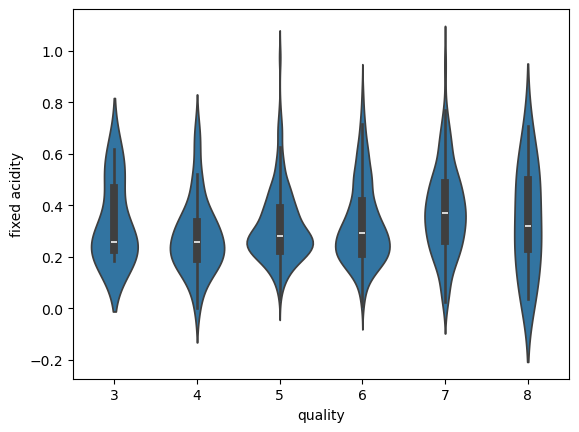

In [318]:
sns.violinplot(y=df["fixed acidity"],x=df["quality"])

In [ ]:
sns.pairplot(df)

<Axes: >

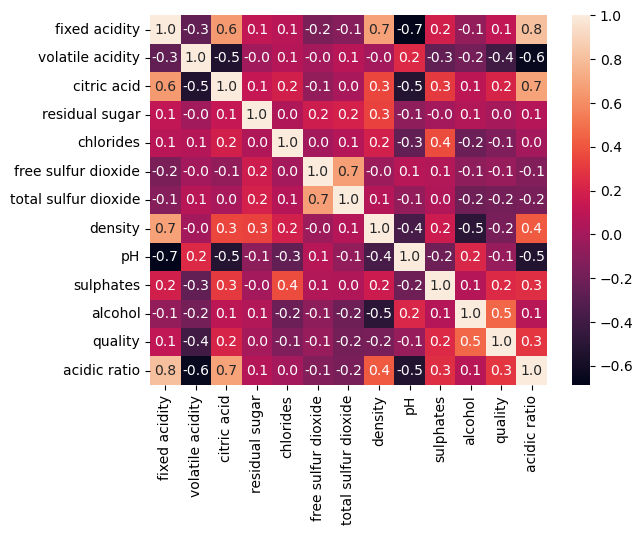

In [360]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")

<Axes: >

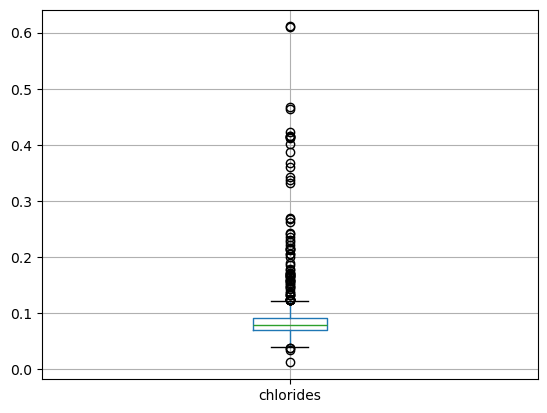

In [362]:
df.boxplot(column="chlorides")